# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

Link to field descriptions https://www.kaggle.com/c/stumbleupon/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

In [2]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [3]:
su.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label'],
      dtype='object')

In [4]:
su.head(3)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1


In [5]:
su.shape

(7395, 27)

In [6]:
su.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

In [7]:
su.alchemy_category_score = su.alchemy_category_score.replace('?', np.nan)
su = su.dropna()
su.alchemy_category_score = su.alchemy_category_score.apply(float)

## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [8]:
# goal is to describe realtionships for dataset only

import statsmodels.formula.api as smf
# in this instance do not get rid of intercept (-1) if running stats logistic regression, only use if predicting

formula = """label ~ alchemy_category_score +  avglinksize + commonlinkratio_1 +
       commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 +
       compression_ratio + embed_ratio + frameTagRatio +
       hasDomainLink + html_ratio + image_ratio +
       lengthyLinkDomain + linkwordscore +
       non_markup_alphanum_characters + numberOfLinks + numwords_in_url +
       parametrizedLinkRatio + spelling_errors_ratio 
       """
# X an Ys
logreg = smf.logit(formula, data = su)

#running model
logreg_results = logreg.fit()

# cross_val score



#summary of results
logreg_results = logreg_results.summary()

print logreg_results




Optimization terminated successfully.
         Current function value: 0.645467
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5033
Method:                           MLE   Df Model:                           19
Date:                Wed, 18 May 2016   Pseudo R-squ.:                 0.06787
Time:                        16:42:27   Log-Likelihood:                -3261.5
converged:                       True   LL-Null:                       -3499.0
                                        LLR p-value:                 1.004e-88
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          1.9466      0.242      8.051     

In [9]:
all_columns = su.columns
cat_columns = ['alchemy_category']
cont_columns = ['alchemy_category_score', 'avglinksize']
su[all_columns].iloc[0:10]

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0
6,http://gofashionlane.blogspot.tw/2012/06/ameri...,8685,"{""title"":""fashion lane American Wild Child "",""...",arts_entertainment,0.221110,0.773810,0.215054,0.053763,0.043011,0.043011,...,1,0,21,0,1287,93,3,0.548387,0.064327,1
10,http://www.reuters.com/,2293,"{""title"":""Business Financial News Breaking US ...",business,0.816604,2.506527,0.637755,0.293367,0.091837,0.048469,...,1,1,53,0,4401,392,0,0.160714,0.073684,0
11,http://www.midwestsportsfans.com/2010/12/photo...,3651,"{""title"":""A Tip of the Cap to The Greatest Iro...",sports,0.891560,4.986111,0.640000,0.426667,0.320000,0.293333,...,?,1,40,0,2701,75,8,0.186667,0.115385,0
12,http://www.ivillage.com/our-dirty-mouths/4-b-1...,1917,"{""title"":""9 Foods That Trash Your Teeth "",""bod...",health,0.872323,3.056911,0.595588,0.227941,0.044118,0.014706,...,1,1,64,0,1062,136,9,0.169118,0.180328,1
14,http://www.phillyburbs.com/blogs/type-a-kitche...,2110,"{""url"":""phillyburbs blogs type a kitchen frenc...",recreation,0.559991,2.299492,0.547414,0.206897,0.056034,0.017241,...,?,1,37,0,3610,232,11,0.215517,0.080205,0


In [10]:
# split apart columns that are target dummy coded
#normalize all predictor columns 
#concantenate all columns back together

dummytarget = su[["hasDomainLink","lengthyLinkDomain","label"]]
normalize = su[["alchemy_category_score", "avglinksize","commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", "compression_ratio","embed_ratio","frameTagRatio","html_ratio","image_ratio","linkwordscore","non_markup_alphanum_characters","numberOfLinks", "numwords_in_url","parametrizedLinkRatio","spelling_errors_ratio"]]


In [11]:
# how do I use pipeline to normalize my predictor columns?
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
predictorsnormalized = standard_scaler.fit_transform(normalize)


In [12]:
#convert numpy array to dataframe
predictorsnormdf = pd.DataFrame(predictorsnormalized, columns = ["alchemy_category_score", "avglinksize","commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", "compression_ratio","embed_ratio","frameTagRatio","html_ratio","image_ratio","linkwordscore","non_markup_alphanum_characters","numberOfLinks", "numwords_in_url","parametrizedLinkRatio","spelling_errors_ratio"

])

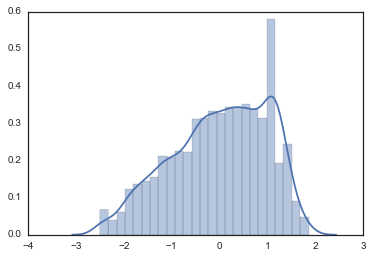

In [13]:
# normalization of predictor rows; makes mean of column 0; pushes distribution towards normal; for ease of interpreting
#coeffcients 
#import seaborn as sns
sns.distplot(predictorsnormalized[:,0])


In [14]:
#rejoin dataframes


frames = [dummytarget, predictorsnormdf]

su_norm = pd.concat(frames, axis = 1)



In [15]:
# check for unique values in all columns
col = su_norm.columns
for i in col:
    print su_norm[i].unique()

[  0.  nan   1.]
[  1.   0.  nan]
[  0.   1.  nan]
[ 0.87292916 -0.13713086  1.84733377 ..., -1.91249751  0.06832124
         nan]
[-0.0874052   0.07266537 -0.05511037 ..., -0.0723594  -0.18895223
         nan]
[ 1.07095745  0.22349295  0.49513625 ...,  1.03621667  0.3820367
         nan]
[-0.05356346  0.52177356  0.75038335 ...,  0.0024596   0.2295271
         nan]
[-0.47635608  1.310514    0.30648729 ..., -0.78109362 -0.58765366
         nan]
[-0.36456953  1.32831061 -0.09693954 ..., -0.43355292  1.99414351
         nan]
[-0.2274663  -0.22142494 -0.20762514 ..., -0.19967178 -0.16703149
         nan]
[ 0.25150447  0.26847736  0.29592287  0.26006047  0.48346723 -3.92382517
  0.38198352  0.2759216   0.25782116  0.2774382   0.26580355  0.42547654
  0.28438108  0.27727811  0.28743674  0.29165187  0.28464201  0.2564751
  0.32606393  0.33729892  0.30949516  0.25956495  0.29789702  0.27665706
  0.26439129  0.28116934  0.27793061  0.27325098  0.26035051  0.2989514
  0.26565813  0.2691219   0.

In [16]:
#drop null values
su_norm.dropna(inplace = True)

In [17]:
# back to "dummy" code format of int
su_norm[["hasDomainLink","lengthyLinkDomain","label"]] = su_norm[["hasDomainLink","lengthyLinkDomain","label"]].astype(int)

In [18]:
su_norm.dtypes

hasDomainLink                       int64
lengthyLinkDomain                   int64
label                               int64
alchemy_category_score            float64
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
frameTagRatio                     float64
html_ratio                        float64
image_ratio                       float64
linkwordscore                     float64
non_markup_alphanum_characters    float64
numberOfLinks                     float64
numwords_in_url                   float64
parametrizedLinkRatio             float64
spelling_errors_ratio             float64
dtype: object

In [19]:
#forgot to add alchemy_category to su_norm data frame

su_norm["alchemy_category"] = su["alchemy_category"]

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


In [21]:
#to cross_validate you SKlearn

import patsy

from patsy import dmatrices

# create Patsy formula and matrices

formula7 = """label ~ alchemy_category_score +  avglinksize + commonlinkratio_1 +
       commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 +
       compression_ratio + embed_ratio + frameTagRatio +
       hasDomainLink + html_ratio + image_ratio +
       lengthyLinkDomain + linkwordscore +
       non_markup_alphanum_characters + numberOfLinks + numwords_in_url +
       parametrizedLinkRatio + spelling_errors_ratio + C(alchemy_category) -1
       """


Y7, X7 = patsy.dmatrices(formula7, data = su_norm, return_type='dataframe')

In [22]:
lg7 = LogisticRegression()

In [23]:
X7_train, X7_test, Y7_train, Y7_test = train_test_split(X7, Y7, test_size=0.33)

In [24]:
lg7.fit(X7_train, Y7_train)

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
lg7.predict(X7_test)

array([ 1.,  1.,  0., ...,  0.,  0.,  0.])

In [26]:
lg7.score(X7_test,Y7_test)

0.6502636203866432

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


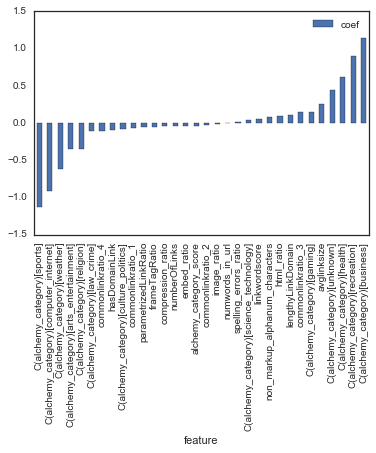

In [27]:
# Create Dataframe with Features tied to their Coefs
coef_df = pd.DataFrame(zip(X7.columns, lg7.coef_[0]), columns=['feature', 'coef'])
coef_df = coef_df.sort('coef')
coef_df.plot('feature', 'coef', kind='bar')

In [28]:
coef = lg7.coef_
print coef


[[-0.3541533   1.14506601 -0.90827852 -0.07464794  0.15159746  0.61358005
  -0.11194055  0.90470065 -0.34386374  0.04465987 -1.12704387  0.43994447
  -0.62156398 -0.03992681  0.25426884 -0.06377514 -0.02431744  0.14349762
  -0.11180246 -0.04395149 -0.04177845 -0.04884079 -0.09633521  0.09517176
  -0.00754431  0.1027142   0.05361096  0.08663682 -0.04253589 -0.00447264
  -0.05588765  0.01862767]]


## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

In [29]:


#1import below modules
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

#2import patsy and create formula/matrices-see above

#3instantiatee LR sckikit learn model object
lr = LogisticRegression()

# make Y column one dimensional array so cross_validate can run.
y7 = np.ravel(Y7)

#4cross_validate score
scores = cross_val_score(lr, X7, y7, cv=5)

In [30]:
# 5 my model scores
print scores
#mean score of my model
print np.mean(scores)
#baseline of how well you model is doing soley based on accuracy; essentially 50/50 guessing
print np.mean(y7)




[ 0.63913043  0.67971014  0.63623188  0.64150943  0.66763425]
0.652843230054
0.514211136891


In [31]:
#how do I print coefficients of the best model?

## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [48]:
import pandas as pd, numpy as np
from patsy import dmatrices, dmatrix

from sklearn import linear_model 
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

In [49]:
formula4 = """label ~ alchemy_category_score +  avglinksize + commonlinkratio_1 +
       commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 +
       compression_ratio + embed_ratio + frameTagRatio +
       hasDomainLink + html_ratio + image_ratio +
       lengthyLinkDomain + linkwordscore +
       non_markup_alphanum_characters + numberOfLinks + numwords_in_url +
       parametrizedLinkRatio + spelling_errors_ratio + C(alchemy_category) -1
       """


Y2, X2 = patsy.dmatrices(formula4, data = su_norm)

In [50]:
logistic = linear_model.LogisticRegression()

In [51]:
print max(np.logspace(0.0, 5.0, 20))
print min(np.logspace(-1.0, 5.0, 20))

100000.0
0.1


In [52]:
20 * 2 * 2* 2 * 2* 2

640

In [53]:
logistic = linear_model.LogisticRegression()

In [54]:
Cs = np.logspace(0.0, 5.0, 20)
# Cs = [.1, .5, 1, 1.2]

search_parameters = {
    "penalty":             ['l1','l2'],   
    "C":                   Cs,  
    "fit_intercept":       [False, True], 
    "class_weight":        [None, "balanced"], 
    "intercept_scaling":   [2, 1],        
    "warm_start":          [False, True]
}

gs1 = GridSearchCV(logistic, search_parameters)

In [62]:
y2 = np.ravel(Y2)
gs1.fit(X2, y2)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'warm_start': [False, True], 'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,  ...[2, 1], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [72]:

print "Best C / Regularization Param:", gs1.best_estimator_.C # This estimator.best_estimator_ object has many great reporting metrics
print "Best Params:", gs1.best_params_
print "Best Score:", gs1.best_score_


 Best C / Regularization Param: 1.0
Best Params: {'warm_start': False, 'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'penalty': 'l2', 'class_weight': None}
Best Score: 0.651972157773


In [82]:
 a = linear_model.LogisticRegression(warm_start = False, C= 1.0, 
                                     intercept_scaling = 2, 
                                     fit_intercept = False, 
                                     penalty = "l2", 
                                     class_weight= None)

In [83]:
from sklearn.cross_validation import cross_val_score

In [85]:
scores2 = cross_val_score(a, X2, y2, cv=5)

In [86]:
print scores2

[ 0.64347826  0.67681159  0.63478261  0.64150943  0.66618287]


# I learned too late how to pass data to grid seach, that is all of dataset should be passed.

# I now understand that you train_test_split or cross_val_ your subsequent model to test the "quality" of your model.

# Therefore the rest of the gridsearches below will be executed incorrectly.


## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

In [54]:
# KNN MODEL WITH A SET NUMBER OF NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier


# instantiate model object and set n_neighbors
modelone = KNeighborsClassifier(n_neighbors=5)

In [55]:
import patsy

from patsy import dmatrices



formula5 = """label ~ alchemy_category_score +  avglinksize + commonlinkratio_1 +
       commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 +
       compression_ratio + embed_ratio + frameTagRatio +
       hasDomainLink + html_ratio + image_ratio +
       lengthyLinkDomain + linkwordscore +
       non_markup_alphanum_characters + numberOfLinks + numwords_in_url +
       parametrizedLinkRatio + spelling_errors_ratio + C(alchemy_category) -1
       """


Y, X = patsy.dmatrices(formula5, data = su_norm)

In [56]:
from sklearn.cross_validation import train_test_split

# splits data into test and train at the percentage you specify 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [57]:
#train and fit your the model
modelone.fit(X_train,Y_train)

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
# predict on X_Test
modelone.predict(X_test)

array([ 1.,  1.,  0., ...,  1.,  1.,  0.])

In [59]:
#model score
modelone.score(X_test,Y_test)

0.55555555555555558

In [60]:
#grid search CV KNN

In [61]:
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [62]:
import patsy

from patsy import dmatrices



formula6 = """label ~ alchemy_category_score +  avglinksize + commonlinkratio_1 +
       commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 +
       compression_ratio + embed_ratio + frameTagRatio +
       hasDomainLink + html_ratio + image_ratio +
       lengthyLinkDomain + linkwordscore +
       non_markup_alphanum_characters + numberOfLinks + numwords_in_url +
       parametrizedLinkRatio + spelling_errors_ratio + C(alchemy_category) -1
       """


Y6, X6 = patsy.dmatrices(formula6, data = su_norm)

In [63]:
search_parameters_knn = {
    'n_neighbors':  [3,50], 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2]
}

In [64]:
from sklearn.cross_validation import train_test_split

# splits data into test and train at the percentage you specify 
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, test_size=0.30)

In [65]:

### instantiate knn classifier 
modeltwo = KNeighborsClassifier()

# Intialize GridSearchCV
clf = GridSearchCV(modeltwo, search_parameters_knn)

y6_train = np.ravel(Y6_train)

# Fit our training data
clf.fit(X6_train,y6_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 50], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [66]:
# print best number of neighbors
print "Best Estimator:", clf.best_estimator_.n_neighbors
# print best parameters for model
print "Best Params:", clf.best_params_
#print best score of model
print "Best Score:", clf.best_score_

Best Estimator: 50
Best Params: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree', 'p': 1}
Best Score: 0.605470368835


## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

In [67]:
su["alchemy_category"].value_counts()

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [68]:
df = su.copy()

In [69]:
df.head(2)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1


In [70]:
df.head()


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [71]:
df['religion'] = [1 if x == 'religion' else 0 for x in df["alchemy_category"]]


In [72]:
col2 = df.columns
for i in col2:
    print i
    print df[i].unique()

url
[ 'http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html'
 'http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races'
 'http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit'
 ..., 'http://www.uncoached.com/category/why-i-miss-college/'
 'http://eatthis.menshealth.com/slide/sweet-potatoes?slideshow=77661'
 'http://naturallyella.com/']
urlid
[4042 8471 1164 ..., 8895 1191 5612]
boilerplate
[ '{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Phot

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
df.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label',
       u'religion'],
      dtype='object')

In [75]:
standard_scaler = StandardScaler() #initialize the function

In [76]:
norm = df[['alchemy_category_score','avglinksize','commonlinkratio_1','commonlinkratio_2','commonlinkratio_3','commonlinkratio_4','compression_ratio','embed_ratio','frameTagRatio','html_ratio','image_ratio','linkwordscore','non_markup_alphanum_characters','numberOfLinks','numwords_in_url','parametrizedLinkRatio','spelling_errors_ratio']]
# columns to normalized

In [77]:
binary = df[['alchemy_category','hasDomainLink','lengthyLinkDomain','religion']] #binary columns

In [78]:
pred_norm = standard_scaler.fit_transform(norm)

In [79]:
pred_norm_df = pd.DataFrame(pred_norm, columns = ['alchemy_category_score','avglinksize','commonlinkratio_1','commonlinkratio_2','commonlinkratio_3','commonlinkratio_4','compression_ratio','embed_ratio','frameTagRatio','html_ratio','image_ratio','linkwordscore','non_markup_alphanum_characters','numberOfLinks','numwords_in_url','parametrizedLinkRatio','spelling_errors_ratio']

)

# normalized columns

In [80]:
df_list = [pred_norm_df,binary]  #list of dataframes to concat
final = pd.concat(df_list,axis=1) #concat dataframes

In [81]:
final.head()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,html_ratio,...,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,alchemy_category,hasDomainLink,lengthyLinkDomain,religion
0,0.872929,-0.087405,1.070957,-0.053563,-0.476356,-0.364570,-0.227466,0.251504,0.810149,0.217550,...,-0.301910,-0.002065,-0.056684,0.900988,-0.102446,-0.299721,business,0.0,1.0,0.0
1,-0.137131,0.072665,0.223493,0.521774,1.310514,1.328311,-0.221425,0.251504,1.001572,-0.604411,...,0.494228,-0.066247,0.053313,1.207031,0.061267,0.466929,recreation,0.0,1.0,0.0
2,1.847334,-0.055110,0.495136,0.750383,0.306487,-0.096940,-0.207625,0.251504,0.367976,-0.159626,...,1.240607,-0.455182,0.512712,1.819117,-0.024632,-0.655854,health,0.0,1.0,0.0
3,0.929859,-0.137965,-0.319960,-0.788510,-0.801849,-0.694157,-0.218491,0.251504,0.932883,0.602397,...,-0.301910,-0.384454,-0.380205,-0.017140,-0.733296,0.059928,health,0.0,0.0,0.0
4,0.544170,-0.026144,0.183138,0.059854,0.341848,-0.088896,-0.226893,0.251504,-0.779066,-0.111376,...,-0.799496,0.938323,-0.108447,1.513074,-0.409585,-0.242796,sports,0.0,1.0,0.0


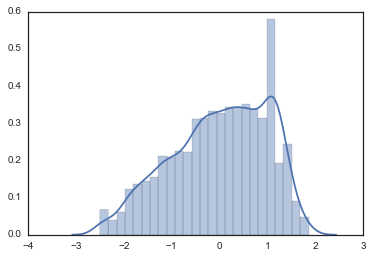

In [82]:
sns.distplot(pred_norm[:,0])

### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

In [83]:
#goal is to see how the variables together (not individually) affect the response variable

### 7.3 Normalize the predictor matrix columns

---

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report


In [87]:
import patsy

formula8 = """religion~ (alchemy_category_score) + (avglinksize + commonlinkratio_1 + 
commonlinkratio_2 + commonlinkratio_3)**2 + (compression_ratio + 
embed_ratio + frameTagRatio + html_ratio + image_ratio)**2 + linkwordscore + 
non_markup_alphanum_characters +(parametrizedLinkRatio + spelling_errors_ratio)**2 + C(hasDomainLink) + C(lengthyLinkDomain) -1
"""



Y8, X8 = patsy.dmatrices(formula8, data = df)

In [88]:
logistic3 = linear_model.LogisticRegression()

#X8_train, X8_test, Y8_train, Y8_test = train_test_split(X8, Y8, test_size=0.33)

#y8_train = np.ravel(Y8_train)



#y8_true, y8_pred = Y8_test, estimator3.predict(X8_test)



In [89]:
Ct = np.logspace(0.0, 5.0, 20)

search_parameters3 = {
    "penalty":             ['l1','l2'],   
    "C":                   Ct,  
    "fit_intercept":       [False, True], 
    "class_weight":        [None, "balanced"], 
    "intercept_scaling":   [2, 1],        
    "warm_start":          [False, True]
}

estimator3 = GridSearchCV(logistic3, search_parameters3)

In [90]:
y8 = np.ravel(Y8)
estimator3.fit(X8, y8)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'warm_start': [False, True], 'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,  ...[2, 1], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [91]:

print "Best Estimator:", estimator3.best_estimator_.C
# print best parameters for model
print "Best Params:", estimator3.best_params_
#print best score of model
print "Best Score:", estimator3.best_score_

Best Estimator: 1.0
Best Params: {'warm_start': False, 'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'penalty': 'l1', 'class_weight': None}
Best Score: 0.98555313675


In [ ]:
# I could not get my grid search to complete running so I stopped.

### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [ ]:
import json

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---